<a href="https://colab.research.google.com/github/hoonzi-s/EDRC_Python/blob/main/02.%20Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# LinearRegression in scikit-learn

In [3]:
data = np.array([[1, 3],
				[2, 3.2],
				[2.3, 4],
				[3.2, 5],
				[3.3, 5.3],
				[4, 6],
				[4.5, 6.8],
				[4.8, 7.1],
				[4.9, 7.2],
				[6.2, 9.3],
				[7, 10.1],
				[7.1, 10.9],
				[8.8, 14.1],
				[9.5, 16.0],
				[10, 17]])

x = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)

In [4]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x, y)
print(lr.coef_)
print(lr.intercept_)

[[1.5948928]]
[-0.02390494]


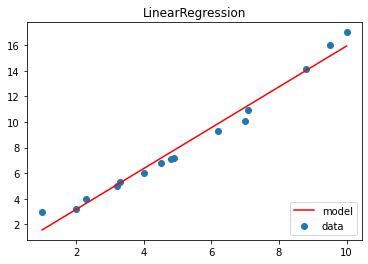

In [5]:
plt.figure()
plt.scatter(x, y, label = 'data')
plt.plot(x, lr.coef_ * x + lr.intercept_, 'r', label = 'model')
plt.title('LinearRegression')
plt.legend(loc = 'lower right')
plt.show()

# LogisticRegression in scikit-learn

In [6]:
data = np.array([[1, 0],
		        [2, 0],
		        [3, 0],
		        [4, 0],
		        [5, 1],
		        [6, 1],
		        [7, 1],
		        [8, 1],
		        [9, 1],
		        [10, 1]])
x = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)

In [7]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(x, y)
a = logistic.coef_
b = logistic.intercept_
z = a * x + b
z

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[-4.12613444],
       [-2.94505883],
       [-1.76398321],
       [-0.58290759],
       [ 0.59816802],
       [ 1.77924364],
       [ 2.96031926],
       [ 4.14139487],
       [ 5.32247049],
       [ 6.50354611]])

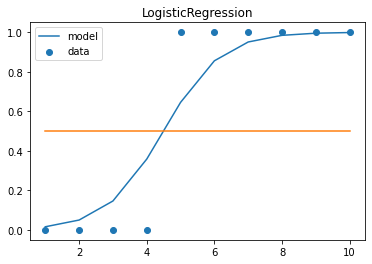

In [8]:
from scipy.special import expit
plt.figure()
plt.scatter(x, y, label = 'data')
plt.plot(x, expit(z), label = 'model')
plt.plot(x, x / x * 0.5)
plt.legend()
plt.title('LogisticRegression')
plt.show()

In [9]:
logistic.score(x, y)

1.0

# Tensorflow

In [10]:
import tensorflow as tf

In [11]:
# 상수 지정
con1 = tf.constant(10)
con2 = tf.constant(20)

In [12]:
# 상수 연산
result1 = tf.add(con1, con2)
result1.numpy()

30

In [13]:
result2 = tf.subtract(con1, con2)
result2.numpy()

-10

In [14]:
result3 = tf.multiply(con1, con2)
result3.numpy()

200

In [15]:
result4 = tf.truediv(con1, con2)
result4.numpy()

0.5

In [16]:
# 상수 행렬 연산
mat1 = tf.constant([[10, 20]], dtype = tf.float32)
mat2 = tf.constant([[30], [40]], dtype = tf.float32)
mat_multiply1 = tf.matmul(mat1, mat2)
mat_multiply2 = tf.matmul(mat2, mat1)
print('Tensorflow 행렬 곱 1: ', mat_multiply1.numpy())
print('Tensorflow 행렬 곱 2: ', mat_multiply2.numpy())

Tensorflow 행렬 곱 1:  [[1100.]]
Tensorflow 행렬 곱 2:  [[300. 600.]
 [400. 800.]]


In [17]:
# 변수 연산
var1 = tf.Variable(10)
var2 = tf.Variable(20)

In [18]:
result5 = tf.add(var1, var2)
result5.numpy()

30

In [19]:
var_mat1 = tf.Variable([[10, 20]], dtype = tf.float32)
var_mat2 = tf.Variable([[30], [40]], dtype = tf.float32)
var_mat_multiply1 = tf.matmul(var_mat1, var_mat2)
var_mat_multiply2 = tf.matmul(var_mat2, var_mat1)
print('Tensorflow 변수 행렬 곱 1: ', var_mat_multiply1.numpy())
print('Tensorflow 변수 행렬 곱 2: ', var_mat_multiply2.numpy())

Tensorflow 변수 행렬 곱 1:  [[1100.]]
Tensorflow 변수 행렬 곱 2:  [[300. 600.]
 [400. 800.]]


# LinearRegression in Tensorflow

In [20]:
data = np.array([[1, 3],
				[2, 3.2],
				[2.3, 4],
				[3.2, 5],
				[3.3, 5.3],
				[4, 6],
				[4.5, 6.8],
				[4.8, 7.1],
				[4.9, 7.2],
				[6.2, 9.3],
				[7, 10.1],
				[7.1, 10.9],
				[8.8, 14.1],
				[9.5, 16.0],
				[10, 17]])

#Data
x_data = data[:,0]
y_data = data[:,1]

In [21]:
import random
a = tf.Variable(random.random())
b = tf.Variable(random.random())

In [22]:
# error cost function
def cost():
  y_pred = a * x_data + b
  error_cost = tf.reduce_mean((y_data - y_pred ) ** 2)
  return error_cost

Epoch: 100, a: 1.5633255243301392, b: 0.17108497023582458, Error cost: 0.44462695717811584
Epoch: 200, a: 1.594711422920227, b: -0.022809356451034546, Error cost: 0.4365513026714325
Epoch: 300, a: 1.5948928594589233, b: -0.02390553243458271, Error cost: 0.43655097484588623
Epoch: 400, a: 1.5948926210403442, b: -0.02390398643910885, Error cost: 0.43655115365982056
Epoch: 500, a: 1.5948927402496338, b: -0.02390463836491108, Error cost: 0.43655115365982056
Epoch: 600, a: 1.5948928594589233, b: -0.023904889822006226, Error cost: 0.436551034450531
Epoch: 700, a: 1.5948927402496338, b: -0.02390499971807003, Error cost: 0.43655121326446533
Epoch: 800, a: 1.5948928594589233, b: -0.02390487864613533, Error cost: 0.436551034450531
Epoch: 900, a: 1.5948927402496338, b: -0.023905035108327866, Error cost: 0.43655121326446533
Epoch: 1000, a: 1.5948927402496338, b: -0.023905012756586075, Error cost: 0.43655121326446533
Epoch: 1100, a: 1.5948928594589233, b: -0.023904813453555107, Error cost: 0.436551

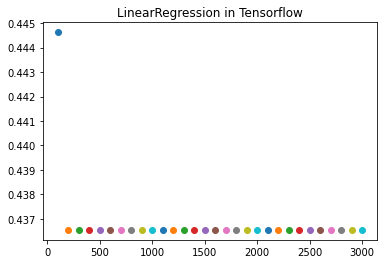

In [23]:
# optimizing algorithm (Gradient Descent)
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.07)

cost_list = []
plt.figure()

for i in range(3000):
  optimizer.minimize(cost, var_list = [a, b])

  if i % 100 == 99:
    cost_list.append(cost().numpy())    
    print(f'Epoch: {i+1}, a: {a.numpy()}, b: {b.numpy()}, Error cost: {cost().numpy()}')
    plt.scatter(i, cost().numpy())

plt.title('LinearRegression in Tensorflow')
plt.show()

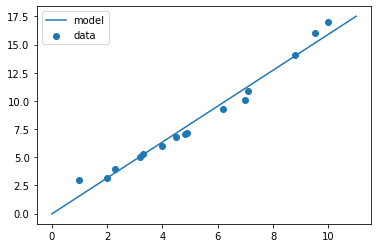

In [24]:
x = np.linspace(0, 11, 100)
y = a * x + b

plt.figure()
plt.scatter(x_data, y_data, label = 'data')
plt.plot(x, y, label = 'model')
plt.legend()
plt.show()

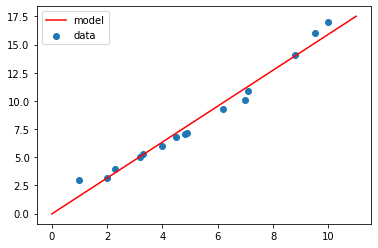

In [25]:
import seaborn as sns

x = np.linspace(0, 11, 100)
y = a * x + b

plt.figure()
plt.scatter(x_data, y_data, label = 'data')
plt.plot(x, y, 'r-', label = 'model')
plt.legend()
plt.show()

In [26]:
df = pd.read_excel('/content/drive/MyDrive/EDRC_Python/excel_linear_data_1.xlsx').to_numpy()
x = df[:, 0].reshape(-1, 1)
y = df[:, 1].reshape(-1, 1)

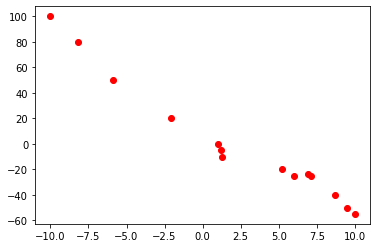

In [27]:
plt.figure()
plt.scatter(x, y, color = 'red')
plt.show()

In [32]:
W1 = tf.Variable(tf.ones([4, 3]), name = 'weight1')
b1 = tf.Variable(tf.zeros([3]), name = 'bias1')
W2 = tf.Variable(tf.ones([3, 3]), name = 'weight2')
b2 = tf.Variable(tf.zeros([3]), name = 'bias2')

In [33]:
def logistic_regression(x):
  L1 = tf.add(tf.matmul(x, W1), b1)
  L1_r = tf.nn.relu(L1)
  L2 = tf.add(tf.matmul(L1_r, W2), b2)
  return tf.nn.softmax(L2)

In [34]:
def cross_entropy():
  y_pred = logistic_regression(x_data)
  return tf.reduce_mean(-tf.reduce_sum(y_data * tf.math.log(y_pred)))

In [35]:
optimizer = tf.keras.optimizers.Adam(lr = 0.01)

for i in range(5000):
  optimizer.minimize(cross_entropy, var_list = [W1, b1, W2, b2])

  if i % 100 == 0:
    print(i, 'W1: ', W1.numpy(), 'B1:', b1.numpy(), 'b2: ', b2.numpy(), 'Error cost: ', cross_entropy().numpy())

print('x 값 넣었을 때 y 예측값: ', logistic_regression(x_data).numpy())

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


InvalidArgumentError: ignored

# Modeling General Curve Fitting

In [37]:
#일반적인 curve fitting 예제 (scipy.optimization 패키지 이용)
#Linear

import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [38]:
#Data
data = np.array([[100, 20],
		[150, 24],
		[170, 27],
		[200, 30],
		[250, 36],
		[260, 38],
		[290, 40],
		[400, 55],
		[410, 57],
		[430, 60],
		[440, 61],
		[460, 62],
		[500, 68],
		[550, 72],
		[600, 80]])

In [41]:
#데이터 분리
x_data = data[:,0] #x_data = data[:,0].reshape(-1,1)으로 하면 row vector로 되어서 ㄴㄴ. column vector로 해야함.
y_data = data[:,1]
print(type(x_data))
print(type(data[:,0].reshape(-1,1)))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [40]:
#모델 형태 지정 1
def Linear_model(x_data, coeff, bias):
    return coeff*x_data + bias

In [42]:
x_data

array([100, 150, 170, 200, 250, 260, 290, 400, 410, 430, 440, 460, 500,
       550, 600])

[0.12250515 6.11654522]
[[ 2.83397027e-06 -9.84332337e-04]
 [-9.84332337e-04  4.05503349e-01]]


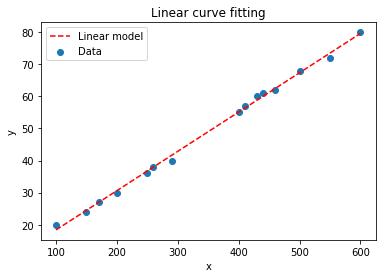

In [45]:
#Data fitting 1
popt, pcov = curve_fit(Linear_model, x_data, y_data)
print(popt)
print(pcov)
y_predict_linear = Linear_model(x_data, popt[0], popt[1])
plt.figure(1)
plt.scatter(data[:, 0], data[:, 1],label='Data')
plt.plot(x_data, y_predict_linear,'r--',label='Linear model')
plt.title("Linear curve fitting")
plt.legend(loc='best')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [46]:
#일반적인 curve fitting 예제 2 (scipy.optimization 패키지 이용)
#Linear

import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [48]:
#Excel data 읽어오기
data_df = pd.read_excel("/content/drive/MyDrive/EDRC_Python/excel_linear_data_1.xlsx")
print(data_df)

#Array data로 바꾸기
data = data_df.values
print(data)

#x_data
x_data = data_df.iloc[:,0]
x_data = x_data.values

#y_data
y_data = data_df.iloc[:,1]
y_data = y_data.values

print(x_data.shape)
print(y_data.shape)

       x    y
0  -10.0  100
1   -8.2   80
2   -5.9   50
3   -2.1   20
4    1.0    0
5    1.2   -5
6    1.3  -10
7    5.2  -20
8    6.0  -25
9    6.9  -24
10   7.1  -25
11   8.7  -40
12   9.5  -50
13  10.0  -55
[[-10.  100. ]
 [ -8.2  80. ]
 [ -5.9  50. ]
 [ -2.1  20. ]
 [  1.    0. ]
 [  1.2  -5. ]
 [  1.3 -10. ]
 [  5.2 -20. ]
 [  6.  -25. ]
 [  6.9 -24. ]
 [  7.1 -25. ]
 [  8.7 -40. ]
 [  9.5 -50. ]
 [ 10.  -55. ]]
(14,)
(14,)


[-6.96746023 14.99293063]
[[ 0.15940544 -0.34955337]
 [-0.34955337  7.25966534]]


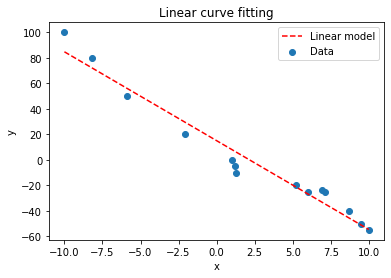

In [49]:
#모델 형태 지정 1
def Linear_model(x_data, coeff, bias):
    return coeff*x_data + bias

#Data fitting 1
popt, pcov = curve_fit(Linear_model, x_data, y_data)
print(popt)
print(pcov)
y_predict_linear = Linear_model(x_data, popt[0], popt[1])
plt.figure(1)
plt.scatter(data[:, 0], data[:, 1],label='Data')
plt.plot(x_data, y_predict_linear,'r--',label='Linear model')
plt.title("Linear curve fitting")
plt.legend(loc='best')
plt.xlabel("x")
plt.ylabel("y")
plt.show()


In [50]:
#일반적인 curve fitting 예제 (scipy.optimization 패키지 이용)
#Nonlinear

import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#Excel data 읽어오기
data_df = pd.read_excel("/content/drive/MyDrive/EDRC_Python/excel_nonlinear_data_1.xlsx")
print(data_df)

#Array data로 바꾸기
data = data_df.values
print(data)

#x_data
x_data = data_df.iloc[:,0]
x_data = x_data.values

#y_data
y_data = data_df.iloc[:,1]
y_data = y_data.values

print(x_data.shape)
print(y_data.shape)


       x    y
0  -10.0  100
1   -8.2   80
2   -5.9   50
3   -2.1   20
4    1.0    0
5    1.2   -1
6    1.3   -2
7    5.2   10
8    6.0   13
9    6.9   18
10   7.1   20
11   8.7   30
12   9.5   36
13  10.0   40
[[-10.  100. ]
 [ -8.2  80. ]
 [ -5.9  50. ]
 [ -2.1  20. ]
 [  1.    0. ]
 [  1.2  -1. ]
 [  1.3  -2. ]
 [  5.2  10. ]
 [  6.   13. ]
 [  6.9  18. ]
 [  7.1  20. ]
 [  8.7  30. ]
 [  9.5  36. ]
 [ 10.   40. ]]
(14,)
(14,)


[-3.11094743  0.6721263   5.78321978]
[[ 2.10019066e-02 -4.81579505e-04 -2.41220162e-02]
 [-4.81579505e-04  6.87126039e-04 -3.02371574e-02]
 [-2.41220162e-02 -3.02371574e-02  2.27169430e+00]]


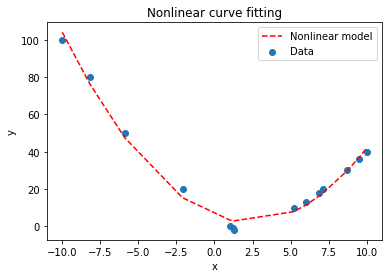

In [51]:
#모델 형태 지정 2
def Nonlinear_model(x, coeff1, coeff2, bias):
    return coeff2*x**2 + coeff1*x_data + bias

#Data fitting 2
popt2, pcov2 = curve_fit(Nonlinear_model, x_data, y_data)
print(popt2) #fitting parameters
print(pcov2)
y_predict_nonlinear = Nonlinear_model(x_data, popt2[0], popt2[1], popt2[2])
plt.figure(2)
plt.scatter(data[:, 0], data[:, 1],label='Data')
plt.plot(x_data, y_predict_nonlinear,'r--',label='Nonlinear model')
plt.legend(loc='best')
plt.title("Nonlinear curve fitting")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [52]:
#일반적인 curve fitting 예제 (scipy.optimization 패키지 이용)
#Nonlinear + multivariable

import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [53]:
#Data
data = np.array([[100, 30, 20],
		        [100, 32, 21],
		        [110, 35, 21],
		        [120, 37, 25],
		        [130, 37, 18],
		        [130, 40, 22],
		        [150, 41, 24],
		        [190, 45, 30],
		        [200, 47, 35],
		        [240, 49, 32],
		        [255, 50, 30],
		        [270, 55, 29],
		        [300, 55, 25],
		        [350, 57, 23],
		        [400, 60, 19]])

#데이터 분리
x1_data = data[:,0] #x_data = data[:,0].reshape(-1,1)으로 하면 row vector로 되어서 ㄴㄴ. column vector로 해야함.
x2_data = data[:,1]
y_data = data[:,2]
# print(type(x_data))
# print(type(data[:,0].reshape(-1,1)))

[ 1.95826147e-03  2.19553466e-01 -4.95537587e-02  1.50285732e+00
 -9.98026867e+00  1.01711406e+02]


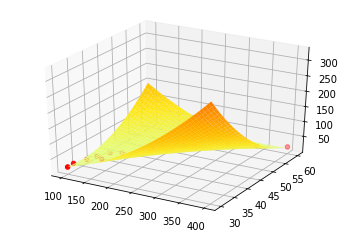

In [54]:
#모델 형태 지정 2
def Nonlinear_model(X,coeff1, coeff2, coeff3, coeff4, coeff5, coeff6):
    x1, x2 = X
    return coeff1*x1**2 + coeff2*x2**2 + coeff3*x1*x2 + coeff4*x1 + coeff5*x2 + coeff6

#Data fitting 2
popt2, pcov2 = curve_fit(Nonlinear_model, (x1_data,x2_data), y_data)
print(popt2) #fitting parameters
y_predict_nonlinear = Nonlinear_model((x1_data, x2_data), popt2[0], popt2[1], popt2[2], popt2[3], popt2[4], popt2[5])

#그래프 그리기
x1 = np.arange(100, 400)
x2 = np.arange(30, 60)
x1_grid, x2_grid = np.meshgrid(x1,x2)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1_grid, x2_grid,
                Nonlinear_model((x1_grid, x2_grid),popt2[0], popt2[1], popt2[2], popt2[3], popt2[4], popt2[5]),
                cmap='Wistia', label="Model")
ax.scatter(x1_data, x2_data, y_data, marker='o', c='r',label='Data')
# plt.legend(loc='best')
plt.show()

In [55]:
t = np.linspace(0, 10)

In [56]:
t

array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])